Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
Datos=pd.read_csv('C:/Users/PERSONAL/Analisis_Fase5/Titanic-Dataset.csv')

In [3]:
Datos.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificacion de valores atipicos de clase de embarque')

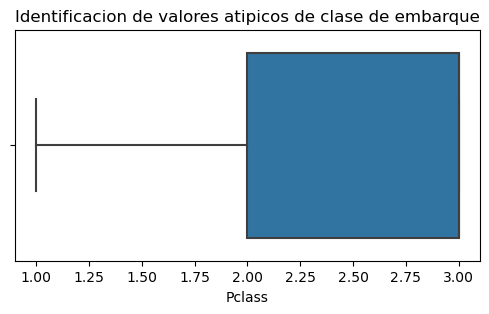

In [5]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificacion de valores atipicos de clase de embarque')

Text(0.5, 1.0, 'Identificacion de valores atipicos de los que sobrevivieron')

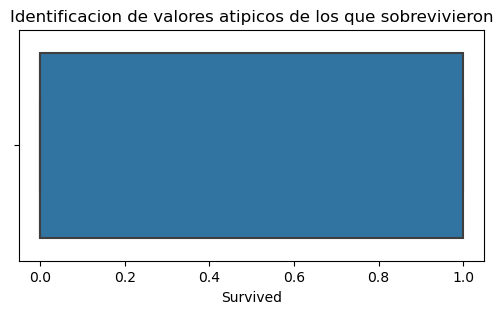

In [6]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificacion de valores atipicos de los que sobrevivieron')


In [7]:
print("Cantidad de registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Genero: ",Datos['Sex'].isin([0]).sum())
print("Cantidad de registros con cero en Clase de embarque: ",Datos['Pclass'].isin([0]).sum())

Cantidad de registros con cero en Edad:  0
Cantidad de registros con cero en Genero:  0
Cantidad de registros con cero en Clase de embarque:  0


In [8]:
nivel_minimo=0
nivel_maximo=1
Total_Atipicos=((Datos['Survived']<nivel_minimo)|(Datos['Survived']>nivel_maximo)).sum()
print("El total de datos atipicos de los que sobrevivieron: {}".format(Total_Atipicos))

El total de datos atipicos de los que sobrevivieron: 0


In [9]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
Datossolos= Datos.drop(columns=["Name","Sex","Ticket","Embarked", "Cabin"])

In [11]:
Datossolos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [12]:
Datossolos['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
Datossolos['Age'].fillna(0, inplace = True)
Datossolos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,0.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [15]:
Datossolos['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
print("Cantidad de registros con cero en Edad: ",Datossolos['Age'].isin([0]).sum())

Cantidad de registros con cero en Edad:  177


In [18]:
Datossolos['Age']=Datossolos['Age'].replace(0,Datossolos['Age'].mean())

In [19]:
Datossolos['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.799293
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristica de interes para  la variable objetivo es los que sobrevivieron.
Survived:  0 = NO, 1 = SI

In [20]:
Datossolos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
Datossolos[['Survived']].head(60)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


Dividir el dataset en Train y Test para evaluar correctamente el modelo
porcentaje para entrenamiento (train) 75% y porcentaje para pruebas (test) 25%

In [23]:
X=Datossolos.drop('Survived',axis=1)
Y=Datossolos['Survived']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=0)


In [24]:
print(X_train)

     PassengerId  Pclass        Age  SibSp  Parch     Fare
671          672       1  31.000000      1      0  52.0000
417          418       2  18.000000      0      2  13.0000
634          635       3   9.000000      3      2  27.9000
323          324       2  22.000000      1      1  29.0000
379          380       3  19.000000      0      0   7.7750
..           ...     ...        ...    ...    ...      ...
131          132       3  20.000000      0      0   7.0500
490          491       3  23.799293      1      0  19.9667
528          529       3  39.000000      0      0   7.9250
48            49       3  23.799293      2      0  21.6792
80            81       3  22.000000      0      0   9.0000

[668 rows x 6 columns]


In [25]:
print(Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


Entrenar el modelo configurando los diferentes hiperparámetros.

In [26]:
modelo_regresion=LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train,Y_train)

prediccion=modelo_regresion.predict(X_test)

In [27]:
print(Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [28]:
print (prediccion)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1]


Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [29]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       137
           1       0.66      0.38      0.49        86

    accuracy                           0.69       223
   macro avg       0.68      0.63      0.63       223
weighted avg       0.68      0.69      0.66       223



Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

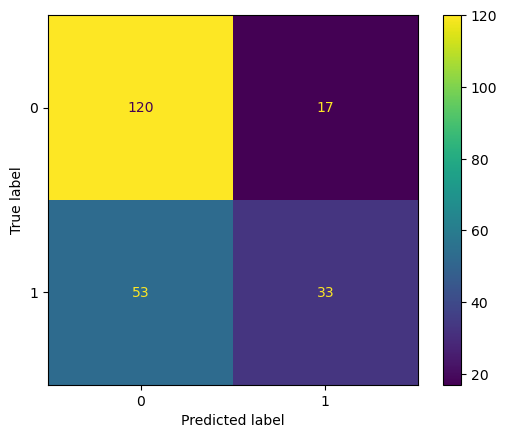

In [30]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Interpretar, analizar y documentar los resultados obtenidos.
Analisis regression logistica:
Del desempeño del modelo se puede evidencia que:

1.	Precisión la cual mide la proporción de predicciones positivas verdaderamente entre todas las predicciones positivas realizadas por el modelo, por lo tanto, se evidencia que la precisión del modelo con respecto a sobrevivencia es de 0,66 lo que significa que el 66% de lo casos predichos por el modelo efectivamente sobrevivieron.
   
#2.	Recall la cual mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Es así como el Recall para la posibilidad de sobrevivir es de 0,38 lo cual indica que el modelo identifico correctamente al 38% de todas las personas que sobrevivieron.

#3.	F1 score que corresponde a la medida armonica de precisión y recuperación, proporciona una puntuacion única que equilibra la precisión y Recall, en este caso el F1 score para la posibilidad de sobrevivir es de 0,49 lo que indica que no hay un equilibrio entre la precisión y Recall.

De la matriz de precisión evidenciada podemos indicar:

#1.	Verdaderos negativos (VN) que indica el recuento de casos que un clasificador predijo correctamente como falso o que no sobrevivieron, por lo tanto, tenemos 120 casos que efectivamente no sobrevivieron y el modelo lo predijo así.

#2.	Verdaderos positivos (V) que indica el recuento de casos que un clasificador predijo correctamente como verdadero o que sobrevivieron, por lo tanto, tenemos 33 casos que efectivamente sobrevivieron y el modelo lo predijo así.

#3.	Falso positivos (FP) que indica el recuento de casos que el clasificador predijo como verdaderos o que sobrevivieron pero no es así, por lo tanto, tenemos 17 casos que no sobrevivieron pero el modelo predijo.

#4.	Falso negativos (FP) que indica el recuento de casos que el clasificador predijo como falsos o que no sobrevivieron, pero si , por lo tanto, tenemos 53 casos que sobrevivieron pero el modelo predijo que no.
